# Optimist identifier

Small project to use knowlodege from [Practical DeepLearning for Coders](https://course.fast.ai/) on using DeepLearning algorithm to classify images.
Objective: Given an image of a sailing boat, identify wheter it is an [Optimist](https://en.wikipedia.org/wiki/Optimist_(dinghy)) or not.


In [68]:
from fastbook import *
from fastai.vision.widgets import *

In [10]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [34]:
results = search_images_ddg('optimist sail')
results[0]

'https://www.quantumsails.com/QuantumSails/media/ODClassDocuments/optimist-header-2023.jpg?ext=.jpg'

In [35]:
dest = 'images/optimist_1.jpg'
download_url(results[0], dest)

Path('images/optimist_1.jpg')

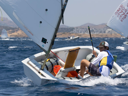

In [36]:
im = Image.open(dest)
im.to_thumb(128,128)

# Dowloading for more than one boat

In [69]:
boat_types = ['Optimist sail','Laser sail','Snipe sail']
path = Path("Boat_types")

In [42]:
if not path.exists():
    path.mkdir()
    for o in boat_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)

In [43]:
fns = get_image_files(path)
fns

(#580) [Path('Boat_types/Optimist sail/89ac1910-31f4-4446-9602-1fefa0d1cbce.jpg'),Path('Boat_types/Optimist sail/3e1a5ccc-8db8-477d-bd48-61ede31fcebf.JPG'),Path('Boat_types/Optimist sail/1617cd7d-c421-44b3-b6e4-81d49eb2756f.jpg'),Path('Boat_types/Optimist sail/19d02ad8-5f80-4445-a0fa-a7222f7b7b5e.jpg'),Path('Boat_types/Optimist sail/f51ef5de-3c2e-4b45-b48a-f3eadfaba1b5.jpg'),Path('Boat_types/Optimist sail/86d3b510-c406-4766-af34-fb91d84c054c.jpg'),Path('Boat_types/Optimist sail/90faf2c1-31e5-44bb-9bc7-b82757849547.jpg'),Path('Boat_types/Optimist sail/964fa64b-fad4-4596-8ca4-532ed879ac15.jpg'),Path('Boat_types/Optimist sail/cd0cf400-8398-4646-b216-4644b437e968.jpg'),Path('Boat_types/Optimist sail/892192ce-0562-4d96-b07a-252d6cb16863.jpg')...]

In [44]:
failed = verify_images(fns)
failed

(#4) [Path('Boat_types/Laser sail/8f46bea0-462d-4b82-b54f-6126bab82efc.jpg'),Path('Boat_types/Laser sail/7587a7cd-0240-486b-a960-7543fb992426.jpg'),Path('Boat_types/Snipe sail/01685de6-be47-4ef3-bc17-e068868bd953.jpg'),Path('Boat_types/Snipe sail/a0e08750-20e0-4c3e-91bd-a80230e212fe.jpg')]

In [45]:
failed.map(Path.unlink);

# Training a model before cleaningbears = DataBlock(


In [70]:
boats = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [71]:
dls = boats.dataloaders(path)

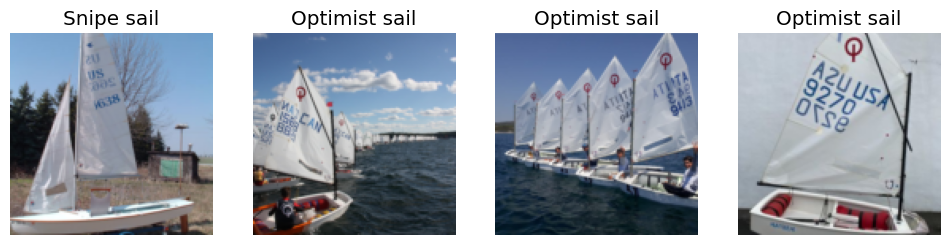

In [72]:
dls.valid.show_batch(max_n=4, nrows=1)

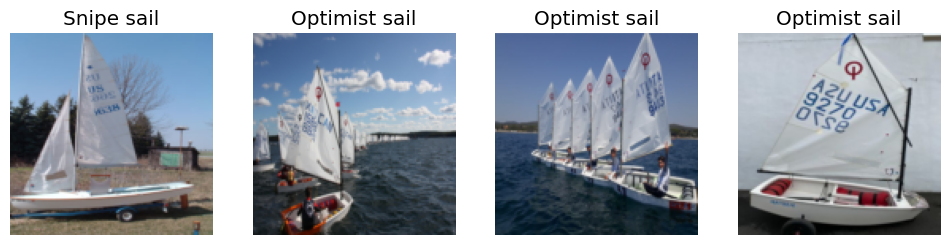

In [73]:
boats = boats.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = boats.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

## Data Augmentation

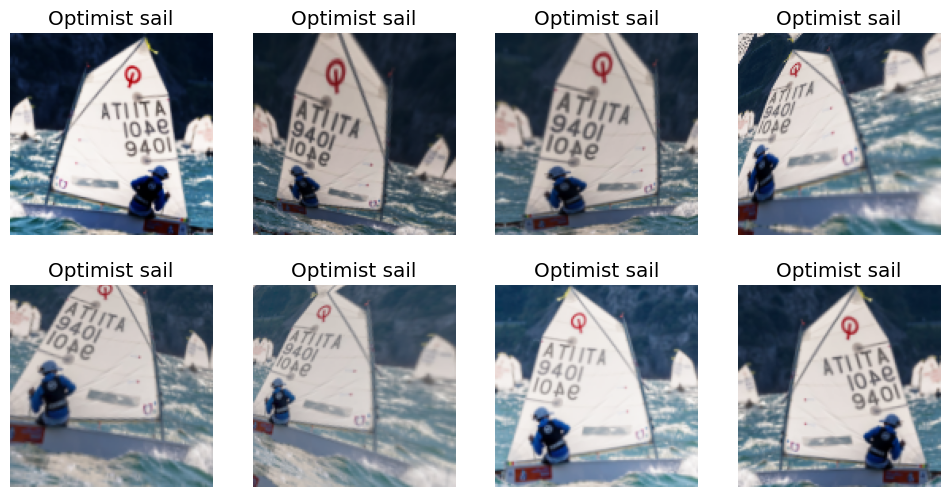

In [74]:
boats = boats.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = boats.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [75]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.931891,3.767714,0.593750,00:07


epoch,train_loss,valid_loss,error_rate,time
0,1.473903,2.673800,0.625000,00:10
1,1.560569,1.662202,0.500000,00:08
2,1.485897,1.319254,0.343750,00:09
3,1.386826,1.130583,0.312500,00:09


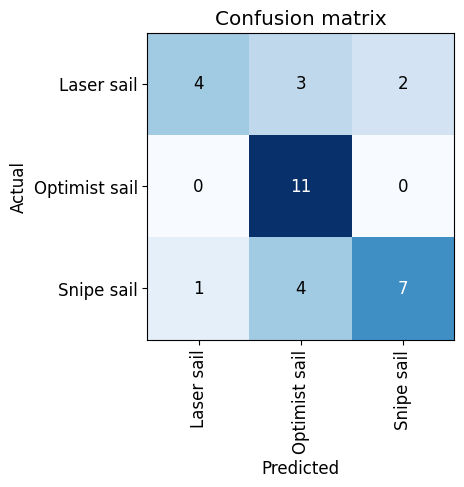

In [76]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

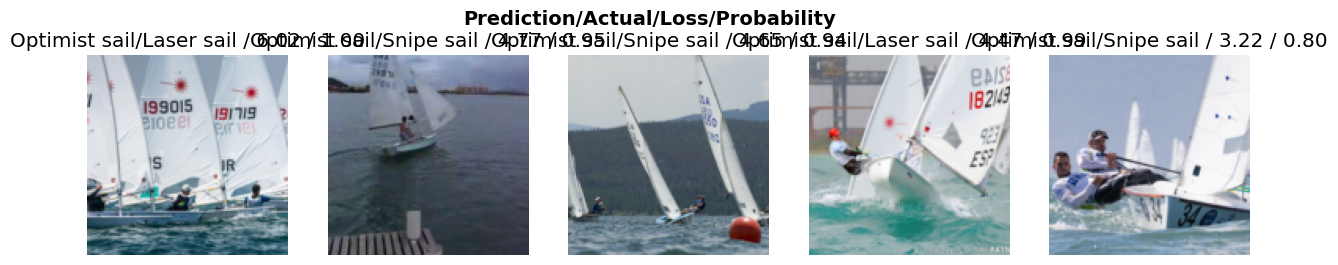

In [77]:
interp.plot_top_losses(5, nrows=1)

In [78]:
interp.most_confused()

[('Snipe sail', 'Optimist sail', 4),
 ('Laser sail', 'Optimist sail', 3),
 ('Laser sail', 'Snipe sail', 2),
 ('Snipe sail', 'Laser sail', 1)]

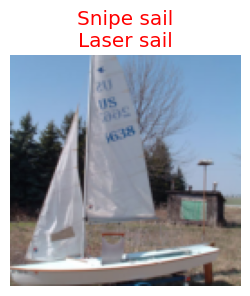

In [84]:
interp.show_results(0)

## Data Cleaning

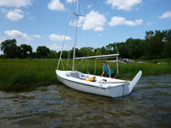

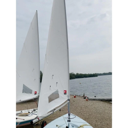

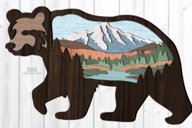

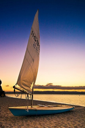

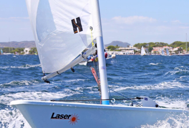

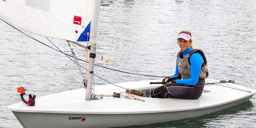

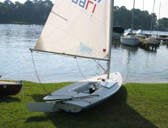

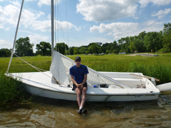

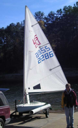

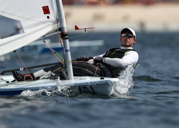

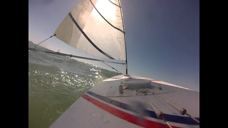

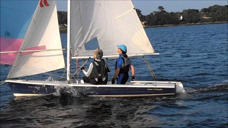

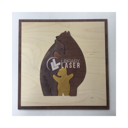

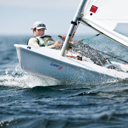

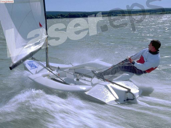

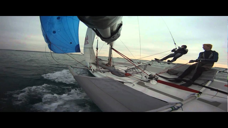

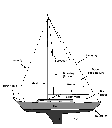

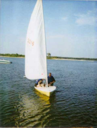

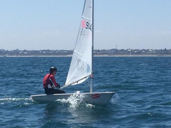

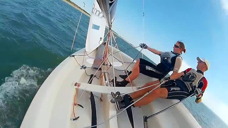

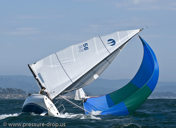

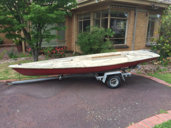

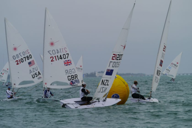

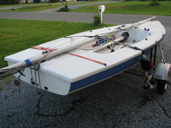

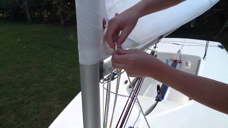

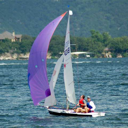

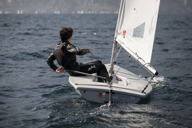

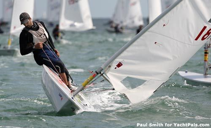

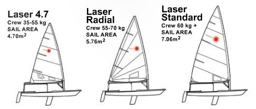

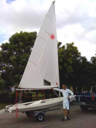

In [67]:
cleaner = ImageClassifierCleaner(learn)
cleaner